# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [313]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [314]:
# Put your EDA code here

display(north_df.head(10), south_df.head(10), north_df.describe(), south_df.describe(), north_df.info(), south_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


None

None

In [315]:
display(
north_df.sort_values(by='Rep ID'), 
south_df.sort_values(by='Rep ID'))

display(pd.unique(north_df['Rep ID']) , pd.unique(south_df['Rep ID']))

north_reps = len(pd.unique(north_df['Rep ID']))
south_reps = len(pd.unique(south_df['Rep ID']))

print("Number of North call center reps:", north_reps, "\n", "Number of South call center reps:", south_reps, "\n")

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
122,122,North,Sales Support,1:00 PM,Outgoing,A,Amanda,NO,0,0,10,2,NaN,3,1
169,169,North,Product Support,12:00 PM,Outgoing,A,Amanda,NO,0,0,10,3,NaN,3,1
145,145,North,Product Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,8,2,NaN,4,1
137,137,North,Product Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,9,1,NaN,3,1
172,172,North,Product Support,12:00 PM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,North,Product Support,4:00 PM,Incoming,B,Xander,NO,0,0,11,3,4.0,4,1
101,101,North,Sales Support,10:00 AM,Outgoing,B,Xander,NO,0,0,10,1,NaN,4,1
63,63,North,Complaint,12:00 PM,Incoming,B,Xander,NO,0,0,10,3,4.0,2,1
206,206,North,Product Support,3:00 PM,Outgoing,B,Xander,NO,0,0,11,1,NaN,2,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
156,156,South,Sales Support,10:00 AM,Outgoing,C,Alice,NO,0,0,9,1,NaN,3,1
209,209,South,Product Support,10:00 AM,Outgoing,C,Alice,NO,0,0,8,2,NaN,2,1
208,208,South,Product Support,10:00 AM,Outgoing,C,Alice,NO,0,0,9,2,NaN,2,1
237,237,South,Product Support,12:00 PM,Outgoing,C,Alice,NO,0,0,12,3,NaN,2,1
242,242,South,Product Support,12:00 PM,Outgoing,C,Alice,NO,0,0,8,2,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,South,Product Support,2:00 PM,Outgoing,C,Susan,NO,0,0,11,2,NaN,3,1
264,264,South,Product Support,2:00 PM,Outgoing,C,Susan,NO,0,0,9,1,NaN,3,1
116,116,South,Product Support,4:00 PM,Incoming,C,Susan,NO,0,0,8,2,5.0,4,1
73,73,South,Complaint,10:00 AM,Incoming,C,Susan,NO,0,0,9,3,3.0,2,1


array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

Number of North call center reps: 9 
 Number of South call center reps: 11 



In [316]:
north_busy_avg = north_df['Busy Minutes'].mean()
north_not_ready_avg = north_df['Not Ready Minutes'].mean()
north_incoming_wait_avg = north_df['Incoming Wait Time'].mean()
north_during_call_wait_avg = north_df['During Call Wait Time'].mean()

south_busy_avg = south_df['Busy Minutes'].mean()
south_not_ready_avg = south_df['Not Ready Minutes'].mean()
south_incoming_wait_avg = south_df['Incoming Wait Time'].mean()
south_during_call_wait_avg = south_df['During Call Wait Time'].mean()

wait_df = pd.DataFrame({'Call Center Location': ['North Call Center', 'South Call Center'],
                        'Average Busy Minutes' : [north_busy_avg, south_busy_avg],
                        'Average Not Ready Minutes' : [north_not_ready_avg, south_not_ready_avg],
                        'Average Incoming Wait Time' : [north_incoming_wait_avg, south_incoming_wait_avg],
                        'Average During Call Wait Time' : [north_during_call_wait_avg, south_during_call_wait_avg]
                       })
wait_df.set_index('Call Center Location')

display(wait_df)

,Call Center Location,Average Busy Minutes,Average Not Ready Minutes,Average Incoming Wait Time,Average During Call Wait Time
0,North Call Center,9.987755,1.914286,3.04878,2.967347
1,South Call Center,10.054140,1.910828,3.00000,3.076433


In [317]:
display(north_df['Time Block'].value_counts().sort_index(), south_df['Time Block'].value_counts().sort_index())


10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?

**North:** 9

**South:** 11

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

**North Call Center**

Average Busy Minutes: 9.987755	
Average Not Ready Minutes: 1.914286	
Average Incoming Wait Time: 3.04878	
Average During Call Wait Time: 2.967347

**South Call Center**

Average Busy Minutes: 10.054140	
Average Not Ready Minutes: 1.910828	
Average Incoming Wait Time: 3.00000	
Average During Call Wait Time: 3.076433

3. What is the number of calls taken for each time block?

**North Call Center**

9:00 AM: 5

10:00 AM: 43

11:00 AM: 25

12:00 PM: 45

1:00 PM: 17

2:00 PM: 35

3:00 PM: 30

4:00 PM: 28

5:00 PM: 17

**South Call Center**

9:00 AM: 5

10:00 AM: 56

11:00 AM: 31

12:00 PM: 75

1:00 PM: 23

2:00 PM: 30

3:00 PM: 43

4:00 PM: 25

5:00 PM: 26


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [318]:
# Clean your data here

del north_df['Unnamed: 0']
del south_df['Unnamed: 0']

In [319]:
# Clean your data here
north_df_no_dupes = north_df.drop_duplicates()
south_df_no_dupes = south_df.drop_duplicates()

In [320]:
north_df = north_df_no_dupes
south_df = south_df_no_dupes

In [321]:
north_df_numeric = north_df.select_dtypes(include=[np.number])
north_numeric_cols = north_df_numeric.columns.values

north_df_non_numeric = north_df.select_dtypes(exclude=[np.number])
north_non_numeric_cols = north_df_non_numeric.columns.values

south_df_numeric = south_df.select_dtypes(include=[np.number])
south_numeric_cols = south_df_numeric.columns.values

south_df_non_numeric = south_df.select_dtypes(exclude=[np.number])
south_non_numeric_cols = south_df_non_numeric.columns.values

In [322]:
#display(north_df[['Incoming or Outgoing', 'Incoming Wait Time']],
#        south_df[['Incoming or Outgoing', 'Incoming Wait Time']]
#       )

north_df_null_incoming = north_df[north_df['Incoming Wait Time'].isnull()]
south_df_null_incoming = south_df[south_df['Incoming Wait Time'].isnull()]

display(north_df_null_incoming.loc[north_df_null_incoming['Incoming or Outgoing'] == 'Incoming'],
        south_df_null_incoming.loc[south_df_null_incoming['Incoming or Outgoing'] == 'Incoming']
       )

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [323]:
display(north_df.loc[north_df['Calls'] != 1],
        south_df.loc[south_df['Calls'] != 1]
       )

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [324]:
north_df.loc[north_df['Sale'] != "NO"]

north_df['Sale'].str.strip()

0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 243, dtype: object

### Cleaning Data Results

Make note of your results!

**1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?**  <br>
Yes, all instances of null data for incoming wait time correspond to outgoing calls.  <p>
**2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?**  <br>
I used the strip function to remove the spaces from all values in the Sale column. This way all calls that made a sale are categorized the same way in this column. <p>
**3. Are there duplicates in the two data sets? If there are, how did you handle them?**  <br>
Yes, there were a small handfull of duplicate rows in each csv. I used the .drop_duplicates() function to remove duplicate rows.  <p>
**4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?**  <br>
Yes, the "Unnamed: 0" row is a redundant index column, so I used the del function to delete it. I initially deleted the Calls column since the value for every column in both data frames was identical and the meaning of the data is not defined and not evident, but once I got to data manipulation I undid this.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [325]:
# Manipulate data here
df = pd.concat([north_df, south_df], ignore_index = True, axis=0)
df.reset_index()
display(df.head(),
        df.tail()
       )

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
549,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
550,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
551,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
552,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
553,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [326]:
df.groupby(['Branch','Rep ID']).sum().sort_values(by=['Branch', 'Calls'], ascending=False)

Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
South  Eric            0          0           361                 54   
       Randy           3          1           312                 63   
       Helga           0          2           292                 58   
       Sandy           1          0           317                 59   
       George          0          0           298                 53   
       Karl            1          0           287                 61   
       Kate            0          0           283                 60   
       Josh            3          0           260                 50   
       Susan           2          0           267                 53   
       Sharon          1          1           257                 38   
       Alice           0          0           199                 46   
North  Brent           0          1           362                 71   
       Lilly           0          2           307                 59   
       Duke            2          0           292                 56   
       Todd            1          0           296                 58   
       Joe             0          0           246                 48   
       Cam             1          0           233                 46   
       Xander          1          0           244                 44   
       Andy            0          3           228                 43   
       Amanda          0          1           218                 41   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
South  Eric                  47.0                    112     35  
       Randy                 47.0                     96     32  
       Helga                 36.0                     95     31  
       Sandy                 34.0                     96     31  
       George                41.0                     87     29  
       Karl                  26.0                     85     28  
       Kate                  34.0                     80     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
       Sharon                29.0                     77     25  
       Alice                 15.0                     58     20  
North  Brent                 17.0                    117     37  
       Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
       Joe                   32.0                     78     25  
       Cam                   32.0                     66     24  
       Xander                20.0                     68     24  
       Andy                  36.0                     65     23  
       Amanda                12.0                     58     22

In [327]:
north_df_abandoned_rate = (north_df['Abandoned'].sum()/north_df['Calls'].sum())*100
print(f"North Call Center Abandonment Rate: {north_df_abandoned_rate}%")

south_df_abandoned_rate = (south_df['Abandoned'].sum()/south_df['Calls'].sum())*100
print(f"South Call Center Abandonment Rate: {south_df_abandoned_rate}%")

df_abandoned_rate = (df['Abandoned'].sum()/df['Calls'].sum())*100
print(f"Company Wide Abandonment Rate: {df_abandoned_rate}%")

North Call Center Abandonment Rate: 2.880658436213992%
South Call Center Abandonment Rate: 1.2861736334405145%
Company Wide Abandonment Rate: 1.9855595667870036%


In [328]:
north_df_service_level = ((north_df['Incoming Wait Time'][north_df['Incoming Wait Time'] <= 2].count()) / north_df['Incoming Wait Time'].count())*100
print(f"North Call Center Service Level: {north_df_service_level}%")

south_df_service_level = ((south_df['Incoming Wait Time'][south_df['Incoming Wait Time'] <= 2].count()) / south_df['Incoming Wait Time'].count())*100
print(f"South Call Center Service Level: {south_df_service_level}%")

df_service_level = ((df['Incoming Wait Time'][df['Incoming Wait Time'] <= 2].count()) / df['Incoming Wait Time'].count())*100
print(f"Company Wide Service Level: {df_service_level}%")


North Call Center Service Level: 40.74074074074074%
South Call Center Service Level: 38.4%
Company Wide Service Level: 39.32038834951456%


In [329]:
north_df_avg_answer_speed = north_df['Incoming Wait Time'].mean()
print(f"North Call Center Average Answer Speed: {north_df_avg_answer_speed} seconds")
      
south_df_avg_answer_speed = south_df['Incoming Wait Time'].mean()
print(f"South Call Center Average Answer Speed: {south_df_avg_answer_speed} seconds")
      
df_avg_answer_speed = df['Incoming Wait Time'].mean()
print(f"Company Wide Average Answer Speed: {south_df_avg_answer_speed} seconds")


North Call Center Average Answer Speed: 3.037037037037037 seconds
South Call Center Average Answer Speed: 3.0 seconds
Company Wide Average Answer Speed: 3.0 seconds


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.  <br>
**North Call Center:** Brent  <br>
**South Call Center:** Eric <p>

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? <br>
**North Call Center Abandonment Rate:** 2.880658436213992%  <br>
**South Call Center Abandonment Rate:** 1.2861736334405145%  <br>
**Company Wide Abandonment Rate:** 1.9855595667870036%  <p>
The North call center's abandonment rate is within the expected range of 2-5%. The south call center and company wide abandomnemt rates are lower than 2%, outperforming the expected abandonment rate KPI.  <p>

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?  <br>
**North Call Center Service Level:** 40.74074074074074%  <br>
**South Call Center Service Level:** 38.4%  <br>
**Company Wide Service Level:** 39.32038834951456%  <p>
    
4. For each branch and the entire company, what is the average speed of answer?  <br>
**North Call Center Average Answer Speed:** 3.037037037037037 seconds  <br>
**South Call Center Average Answer Speed:** 3.0 seconds  <br>
**Company Wide Average Answer Speed:** 3.0 seconds  <br>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

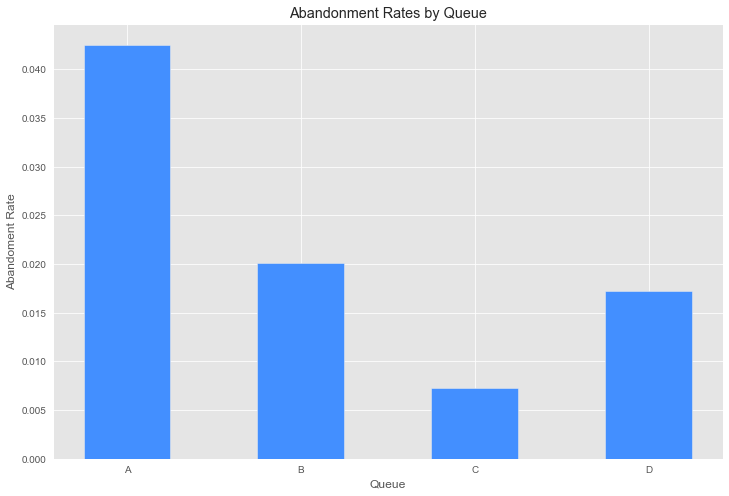

In [330]:
# Create visualization 1 here
# What is the average abandonment rate per queue?
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

queue_keys = abandonment_rates.keys()
abandonment_values = abandonment_rates.values()

plt.bar(queue_keys, abandonment_values, tick_label=queues, color='#438FFF', width=0.5)
plt.xlabel('Queue')
plt.ylabel('Abandoment Rate')
plt.title('Abandonment Rates by Queue')
plt.show()

#I chose a basic bar chart to show a simple comparison between the abandonment rate for each queue; I used one
#color only since color coding did not add value/information to this visualization

In [331]:
# Create visualization 2 here
# What is the service level and average speed of answer per each rep?
# north_plt contains the data you need for the average speed of answer of each rep

all_reps_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [332]:
#updated started code in previous cell to include all reps, not just North location reps
service_level = service_level.sort_values(by='Service Level %', ascending=False)
service_level = service_level.reset_index()

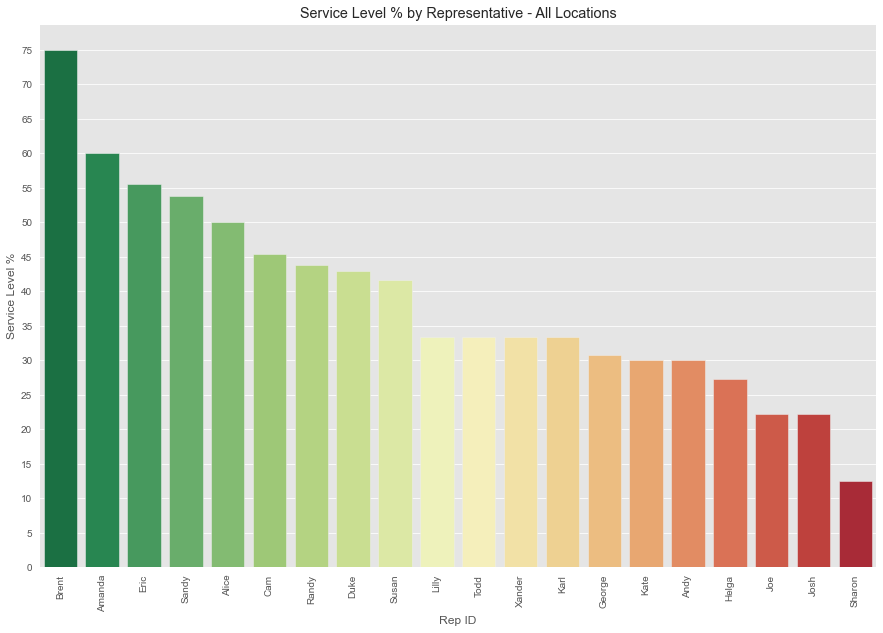

In [333]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
ax = sns.barplot(x = service_level["Rep ID"], y=service_level["Service Level %"], 
                 data=service_level, palette="RdYlGn_r").set(title='Service Level % by Representative - All Locations')

#I again chose a simple bar chart for this visualization to allow comparison between each rep.
#I used the RdYlGn color palette to visually indicate which reps were performing well, which were in the middle
#of the group, and which were underperforming

In [334]:
# Create visualization 3 here
#For each type of call purpose, how many calls are outgoing vs. incoming?
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = pd.DataFrame(df[['Call Purpose', 'Incoming or Outgoing']].value_counts())
#purpose_counts = purpose_counts.swapaxes("index", "columns")
#purpose_counts = purpose_counts.groupby('Call Purpose').sum()
#complaints = purpose_counts["Complaint"].to_dict()
#sales_support = purpose_counts["Sales Support"].to_dict()
#product_support = purpose_counts["Product Support"].to_dict()

In [335]:
purpose_counts = purpose_counts.sort_values(by='Call Purpose')
purpose_counts

0
Call Purpose    Incoming or Outgoing     
Complaint       Incoming               51
Product Support Outgoing              228
                Incoming               82
Sales Support   Outgoing              120
                Incoming               73

In [336]:
purpose_counts = purpose_counts.reset_index()
purpose_counts

,Call Purpose,Incoming or Outgoing,0
0,Complaint,Incoming,51
1,Product Support,Outgoing,228
2,Product Support,Incoming,82
3,Sales Support,Outgoing,120
4,Sales Support,Incoming,73


In [337]:
purpose_counts['Call Counts'] = purpose_counts[0]
del purpose_counts[0]

In [338]:
purpose_counts

,Call Purpose,Incoming or Outgoing,Call Counts
0,Complaint,Incoming,51
1,Product Support,Outgoing,228
2,Product Support,Incoming,82
3,Sales Support,Outgoing,120
4,Sales Support,Incoming,73


[Text(0.5, 1.0, 'Incoming vs. Outgoing Calls by Call Purpose')]

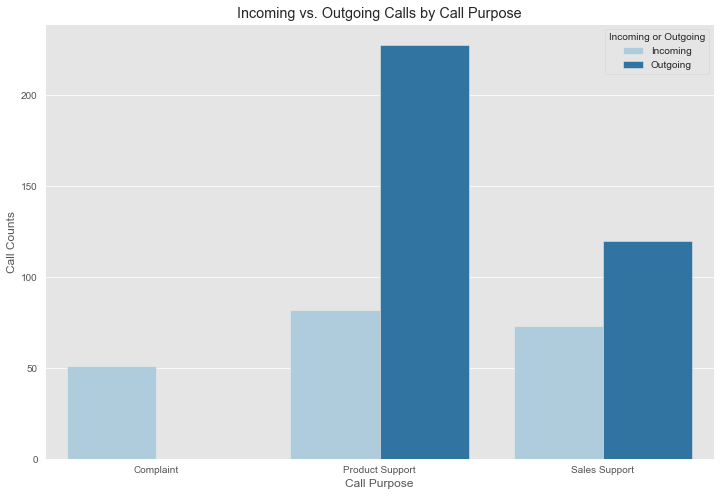

In [339]:
sns.set_palette("Paired")
sns.barplot(x="Call Purpose", y="Call Counts", 
            hue="Incoming or Outgoing", data=purpose_counts).set(title="Incoming vs. Outgoing Calls by Call Purpose")

#I chose a grouped bar plot organized by call type to compare incoming vs. outgoing calls for each call type.
#I used the Paired color palette as it is my understanding that it is designed for this use case

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.  <br>
See inline comments in each visualization section above.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?  <p>
**North Call Center Abandonment Rate:** 2.880658436213992%  <br>
**South Call Center Abandonment Rate:** 1.2861736334405145%  <br>
**Company Wide Abandonment Rate:** 1.9855595667870036%  <p>
    
**North Call Center Service Level:** 40.74074074074074%  <br>
**South Call Center Service Level:** 38.4%  <br>
**Company Wide Service Level:** 39.32038834951456%  <p>

**North Call Center Average Answer Speed:** 3.037037037037037 seconds  <br>
**South Call Center Average Answer Speed:** 3.0 seconds  <br>
**Company Wide Average Answer Speed:** 3.0 seconds  <p>
**North Reps:** Brent, Cam, Todd, Duke, Joe, Lilly, Amanda, Andy, Xander  <br>
**South Reps:** Kate, Eric, Susan, Alice, Sandy, Karl, Randy, George, Helga, Josh, Sharon  <p>
    
While the service level is slightly lower for the South branch, based on the abandonment rate and answer speed they seem to be operating slightly more efficiently. It is worth noting that the south branch has more reps total, but also answers more calls overall. However, the two reps with the highest individual service level work at the north branch, while the two individuals with the lowest service level work at the south branch.  <p>

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?<p>

I would consider a blended option and place 1-2 additional reps at the South location and 3-4 additional reps at the North location. Given the data on individual reps who are high and low performers, I would also recommend additional customer service training for the South location reps, which may be more effective than hiring additional employees. <p>

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?  <p>
    
Call date, call time, and call length would be helpful for finding duplicaates and deciding what to do with them. I would also be interested in more in depth data on the "not ready" or "busy" times - are reps unavailable because they are taking too many breaks, completing tasks necessary to resolve issues that came up in their last call, or something else? This info would help determine whether the real issue is that additional employees are needed, or whether another intervention would improve the customer service KPIs.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [340]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
